# Predicting Hotel Booking Cancelation

#### By: Julia Kelman: [GitHub](https://git.generalassemb.ly/julia-kelman/)

## Problem Statement

Over the years, the hotel industry has changed with a majority of bookings now made through third parties such as Booking.com [(source)](https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy). Those Online Travel Agengies (OTA) have transformed cancelation policies from a footnote at the bottom of the page to the main selling point in their marketing campaigns [(source)](https://triptease.com/blog/the-real-cost-of-free-cancellations/). As a result, customers have become accustomed to free cancelation policies. In fact, a study conducted by D-Edge Hospitality Solutions found that cancellation rate across all channels has risen by 6% over the past four years, reaching almost 40% in 2018 [(source)](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/). This increase in booking cancelation makes it harder for hotels to accurately forecast, leading to non-optimized occupancy and revenue loss [(source)](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/). 

When hotels try to protect themselves by using services such as Booking.com's "Risk Free Reservations", the burden then falls on OTAs. Indeed, this service requires the OTA to pay for the reservation if the booking is canceled and they cannot find a new guest to occupy the room [(source)](https://triptease.com/blog/the-real-cost-of-free-cancellations/).  
One thing is clear, whether you are a hotel or an OTA, cancelations have an negative impact on your business.  

Characteristics of the booking itself may be good indicators of whether or not a booking will be canceled. For instance, the average length of stay of canceled reservations is 65% higher than non-canceled booking, with a lead time of 60 days [(source)](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/). Engaging with the reasons why people are cancelling and what types of bookings are being canceled is crucial.


Depending on their cancelation policy, hotels may lose a lot of money every year due to booking cancelations [research]. Indeed, cancelations affect a hotel's ability to forecast their revenue and affects their income.   
In addition, reviews and customer satisfaction are more important than ever [research] and any hotel which ever got a bad review because a customer arrived before their room was ready knows that knowing which booking to prioritize is paramount. It is therefore very useful for hotels to know which bookings are likely to get cancelled in order to plan accordingly.   
In order to solve this problem, we will use a real life hotel booking dataset to create a customer segmentation analysis in order to gain insights about the customers. We will then build a classification model (including the newly created customer clusters) to predict whether or not a booking will be cancelled with the highest accuracy possible.   
This model will allow hotels to predict if a new booking will be cancelled or not, manage their business accordingly, and increase their revenue.   



## Executive Summary

## Table of Contents

- [Loading Data](#Loading-Data)
    - [Library Imports](#Library-Imports)  
    - [Hotel Data Imports](#Hotel-Data-Imports)
    - [Data Dictionary](#Data-Dictionary)
- [Data Cleaning](#Data-Cleaning) 
- [Exploratory Data Analysis](#EDA)
- [Customer Segmentation](#Customer-Segmentation)
- [Model Preparation](#Model-Preparation)
- [Modeling](#Modeling)  
    - [Baseline Model](#Baseline-Model)  
    - [Logistic Regression](#Logistic-Regression)
    - [kNN](#kNN)  
    - [Naive Bayes](#Naive-Bayes) 
    - [SVM](#SVM)
    - [Decision Trees](#Decision-Trees)
- [Model Selection](#Model-Selection)
- [Model Evaluation](#Model-Evaluation)
    - [Confusion Matrix](#Confusion-Matrix)
    - [Understanding Misclassifications](#Understanding-Misclassifications)
    - [Coefficients Interpretation](#Coefficient-Interpretation)
- [Conclusion & Recommendations](#Conclusion-and-Recommendations)
- [References](#References)

## Loading Data 

### Library Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns', None)

### Hotel Data Imports

Data from: https://www.sciencedirect.com/science/article/pii/S2352340918315191

Loading in data for the first hotel, H1, a resort hotel in the region of Algarve in Portugal. 

In [3]:
h1 = pd.read_csv('../data/H1.csv')
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
h1.shape

(40060, 31)

Loading in data for the second hotel, H2, a hotel in the city of Lisbon in Portugal.

In [5]:
h2 = pd.read_csv('../data/H2.csv')
h2.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [6]:
h2.shape

(79330, 31)

In order to answer our problem statement, we need to combine information from both hotels into one dataframe.  
In order to retain information about which hotel each booking belongs to, we need to add a column recording the hotel associated with the booking. In order to make it easier for modeling later on, the same column `is_h1` will be added to both datasets. Bookings belonging to hotel 1 will have a value of `1` while bookings belonging to hotel 2 will have a value of `0` for this feature. 

In [7]:
# Adding a column to h1 to record that bookings belong to hotel 1:
h1['is_h1'] = 1

# Adding a column to h2 to record that bookings do not belong to hotel 1 (and therefore belong to hotel 2):
h2['is_h1'] = 0

In [9]:
# Combining the two datasets: 
hotels = pd.concat(objs = [h1, h2], axis = 0)

# Resetting the index
hotels.reset_index(drop = True, inplace=True)
hotels.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,is_h1
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,1


In [10]:
hotels.shape

(119390, 32)

### Data Dictionary


|**Feature Name**|**Description**|
|:---|:---|
|ADR|...|
|Adults|...|
|Agent|...|
|ArrivalDateDayOfMonth|...|
|ArrivalDateMonth|...|
|ArrivalDateYear|...|
|ArrivalDateWeekNumber|...|
|AssignedRoomType|...|
|Babies|...|
|BookingChanges|...|
|Children|...|
|Company|...|
|Country|...|
|CustomerType|...|
|DaysInWaitingList|...|
|DepositType|...|
|DistributionChannel|...|
|IsCanceled|...|
|IsRepeatedGuest|...|
|LeadTime|...|
|MarketSegment|...|
|Meals|...|
|PreviousBookingsNotCanceled|...|
|PreviousCancellations|...|
|RequiredCarParkingSpaces|...|
|ReservedRoomType|...|
|ReservationStatus|...|
|ReservationStatusDate|...|
|StaysInWeekendNights|...|
|StaysInWeekNights|...|
|TotalOfSpecialRequests|...|

## Data Cleaning

### Missing Data 

In [14]:
hotels.isnull().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         4
Babies                           0
Meal                             0
Country                        488
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

## EDA

### Target Variable: Cancelation

In [24]:
hotels['IsCanceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: IsCanceled, dtype: float64

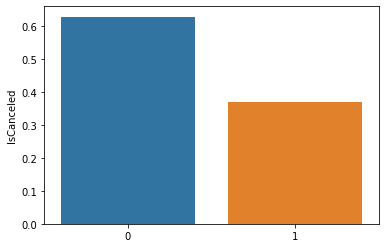

In [25]:
sns.barplot(x=hotels['IsCanceled'].unique(), y=hotels['IsCanceled'].value_counts(normalize=True))

## Customer Segmentation

## Model Segmentation

## Model Preparation

## Modeling

### Baseline Model

### Logistic Regression

### kNN

### Naive Bayes 

### SVM

### Decision Trees

### Neural Networks

## Model Selection

## Model Evaluation

### Confusion Matrix

### Understanding Misclassifications

### Coefficients Interpretation

## Conclusion & Recommentations

## Refererences

- [The Real Cost of Free Cancellations](https://triptease.com/blog/the-real-cost-of-free-cancellations/)     
- [Cancelation Rate at 40% as OTAs Push Free Change Policy](https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy)
- [How Online Hotel Distribution is Changing in Europe](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/) 